In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of CSV filenames
csv_files = ["client_bikel1_benchmark.csv", "client_bikel3_benchmark.csv", "client_bikel5_benchmark.csv", "client_hqc128_benchmark.csv","client_hqc192_benchmark.csv","client_hqc256_benchmark.csv","client_kyber512_benchmark.csv","client_kyber768_benchmark.csv","client_kyber1024_benchmark.csv"]
# Labels for the graph
labels = ["BIKE L1", "BIKE L3", "BIKE L5", "HQC 128","HQC 192","HQC 256", "Kyber 512","Kyber 768","Kyber 1024"]

combined_df = pd.DataFrame()

for file, label in zip(csv_files, labels):
    df = pd.read_csv(file)
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%H:%M:%S")
    start_time = df["timestamp"].iloc[0]
    df["elapsed_seconds"] = (df["timestamp"] - start_time).dt.total_seconds()
    df["elapsed_minutes"] = df["elapsed_seconds"] / 60
    df["wall_time_total_seconds"] = df["wall_time_seconds"].apply(
        lambda x: sum(float(t) * 60 ** i for i, t in enumerate(reversed(str(x).split(":"))))
    )
    df["algorithm"] = label
    combined_df = pd.concat([combined_df, df], ignore_index=True)




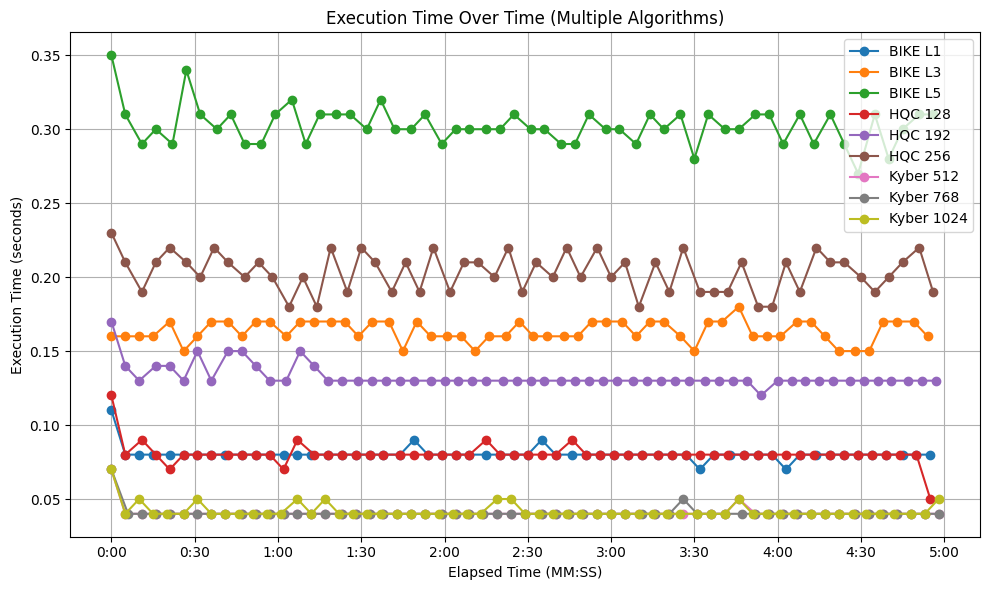

In [16]:
import matplotlib.ticker as ticker

# Plot
plt.figure(figsize=(10, 6))
for label in combined_df["algorithm"].unique():
    subset = combined_df[combined_df["algorithm"] == label]
    plt.plot(subset["elapsed_minutes"], subset["wall_time_total_seconds"], marker='o', label=label)

plt.title("Execution Time Over Time (Multiple Algorithms)")
plt.xlabel("Elapsed Time (MM:SS)")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)

# Define custom ticks: 0, 0.5, 1.0, ..., 5.0
tick_values = [i * 0.5 for i in range(11)]  # every 30 seconds

# Formatter: convert float minutes to MM:SS format
def format_minutes_to_mmss(x, _):
    total_seconds = int(x * 60)
    minutes = total_seconds // 60
    seconds = total_seconds % 60
    return f"{minutes}:{seconds:02d}"

plt.xticks(tick_values)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_minutes_to_mmss))

plt.tight_layout()
plt.savefig("execution_time_plot.png", dpi=300)
plt.show()


In [15]:
plt.savefig("execution_time_plot.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import numpy as np
import glob
import os
import datetime
# Adjust this path to where your CSV files are stored
csv_files = glob.glob("./*.csv")

results = []

print(csv_files)

['./client_bikel3_benchmark.csv', './client_kyber1024_benchmark.csv', './client_hqc128_benchmark.csv', './client_hqc192_benchmark.csv', './client_kyber512_benchmark.csv', './client_hqc256_benchmark.csv', './client_kyber768_benchmark.csv', './client_bikel5_benchmark.csv', './client_bikel1_benchmark.csv']


In [20]:
def convert_to_seconds(t):
    # t = '0:00.16' → 0 min, 0.16 sec
    try:
        parts = t.split(':')
        return int(parts[0]) * 60 + float(parts[1])
    except:
        return None

In [21]:

for file in csv_files:
    df = pd.read_csv(file)
    algo_name = os.path.splitext(os.path.basename(file))[0]  # filename without extension
    df['wall_time_seconds'] = df['wall_time_seconds'].apply(convert_to_seconds)
    mean = df['wall_time_seconds'].mean()
    std = df['wall_time_seconds'].std()
    results.append({
        'Algorithm': algo_name,
        'Mean ± Std Dev': f"{mean:.3f} ± {std:.3f}"
    })

results_df = pd.DataFrame(results)
results_df.sort_values('Algorithm', inplace=True)  # optional: sort alphabetically

# Display as table
print(results_df.to_string(index=False))


                 Algorithm Mean ± Std Dev
   client_bikel1_benchmark  0.081 ± 0.005
   client_bikel3_benchmark  0.164 ± 0.007
   client_bikel5_benchmark  0.302 ± 0.013
   client_hqc128_benchmark  0.081 ± 0.007
   client_hqc192_benchmark  0.133 ± 0.008
   client_hqc256_benchmark  0.203 ± 0.013
client_kyber1024_benchmark  0.042 ± 0.005
 client_kyber512_benchmark  0.041 ± 0.004
 client_kyber768_benchmark  0.041 ± 0.004


In [23]:
with open("benchmark_results.txt", "w") as f:
    f.write(results_df.to_string(index=False))